## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo VI - Redes neurais para dados sequenciais</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---

### Questão 1)

Considere o uso de uma rede neural não recorrente (por exemplo uma rede densa) para o problema de, dado um caracter atual, predizer os $k$ próximos caracteres de uma sentença, sendo formulado como um problema de regressão. Por outro lado, podemos também utilizar arquiteturas recorrentes. Qual alternativa está correta na comparação da adequação das duas abordagens ao problema?

(a) As unidades recorrentes possuem memória que considera a ordem que as instâncias aparecem nas iterações. Redes com unidades densas assumem independência entre as instâncias podendo considerar os dados de entrada em ordem arbitrária, e portanto as densas serão sempre melhores para problemas como o de predição de sequências.<br>
**<span style="color:red">(b) Unidades recorrentes cumprem melhor os requisitos de predizer sequências pois mantêm um sumário que está relacionado ao contexto de um caracter e sua ordem em uma sentença.<br></span>**
(c) Ambas são igualmente adequadas ao problema e devem produzir resultados similares, desde que os dados sejam preparados para cada caso<br>
(d) As unidades densas capturam contexto e as relações de ordenação entre as instâncias, sendo mais adequadas para esse problema.<br>

***Aos 15 min ele fala sobre memória em RNN. Ele basicamente mostra que a estimação atual depende da anterior, portanto entendo que não se assume independência <br>
Aos 18 min ele fala o que é o Sumário***


---

### Questão 2)

Dentre as unidades recorrentes mais conhecidas, destacam-se a RNN tradicional, a GRU e a LSTM, em ordem da unidade com menor número de parâmetros, para aquela com maior número de parâmetros e portanto de maior capacidade. A GRU foi proposta mais recentemente do que as outras, ainda que tenha menos graus de liberdade (capacidade) do que a LSTM. ***Qual a principal motivação de usar GRU frente à LSTM?***

 (a) O mecanismo de esquecimento e atualização de novas informações nos sumários da LSTM se tornou obsoleto.<br>
 (b) A GRU produz resultados significativamente melhores na maior parte dos casos reais do que a LSTM, ainda que seja mais demorada para treinar por iteração.<br>
 (c) A GRU é mais adequada apenas para problemas envolvendo sequência-para-sequência na estratégia encoder-decoder, nas demais tarefas a LSTM é sempre superior.<br>
**<span style="color:red">(d) A GRU possui menos parâmetros, mas mantendo um mecanismo de adição de informação e esquecimento ao sumário, e por isso é geralmente mais fácil de otimizar do que a LSTM.<br></span>**
 
 
***Aos 33 minutos fala que os resultados de GRU e LSTM são similares. Portanto já exclui a (b)<br>
Estes minutos são os que ele aborda no slide 27***

***Selecionei esta resposta mais por entendimento do que por uma resposta explicita. Se o modelo possui menos parâmetros como é o caso da Gru e tem resultados similares, a tendência é que seja mais fácil de otimizar***
 

---
### Questão 3)

Escolha a alternativa que descreve a forma de implementação do ***mecanismo básico de atenção.***

**<span style="color:red">(a) Comparação da similaridade entre um vetor $s$ e um conjunto de vetores $h_i$. Estas similaridades, depois de normalizadas, são utilizadas para realizar uma soma ponderada dos vetores $h_i$, resultando em um vetor $c$ de contexto<br>**</span>
 (b) Por meio de uma unidade recorrente, computa-se uma série de sumários $h$ ao longo de diversas iterações. Esses sumários são então processados por uma camada densa que computa a atenção com base na entrada<br>
 (c) Utilizando uma convolução unidimensional nos vetores $a$ e $b$ individualmente, e depois somando-os<br>
 (d) O mecanismo é implementado por meio do alinhamento entre dois vetores, $a$ e $b$, comumente aplicado por meio de um produto interno. Após esse processo utiliza-se um autoencoder com erro médio quadrático para aprender a atenção do vetor $a$ em relação ao vetor $b$<br>
 
***Slide 46 do material, mas fiquei um pouco em duvida se nao seria a alternativa (b) devido a um comentário feito aproximadamente entre os minutos 11:30 e 12:30 do vídeo 4***


---

### Questão 4)

Carregue a base de dados `starbucks.csv`, conforme abaixo, com uma divisão hold-out utilizando os 85% exemplos iniciais para treinamento e os restantes para teste e normalize no intervalo 0-1.

Grafe a série temporal, e note que há uma modificação brusca na série relativa ao teste, próxima ao ponto 950, que torna difícil sua predição.

Crie duas redes recorrentes, uma baseada em LSTM e outra em GRU, para predizer, ponto-a-ponto, a série temporal de testes. Elas devem conter ativações do tipo ReLU:
* Camada recorrente (LSTM/GRU) com 16 unidades
* Camada recorrente (LSTM/GRU) com 8 unidades
* Dropout de 0.2
* Camada densa de predição 

Treine as duas redes com função de perda MSE, batch_size = 1, por 15 épocas, utilizando Adam com taxa de aprendizado 0.001. Antes de instanciar cada modelo, compilar e treinar, inicialize as sementes com seed(2) e set_seed(2).

Calcule o MSE de teste (considere arredondamento para 4 casas decimais) e trace o gráfico comparando os dados reais com os preditos pelas duas redes. O resultado obtido foi:

(a) GRU com menor erro do que LSTM, mas apenas LSTM foi capaz de melhor predizer o pico na parte final da série<br>
(b) GRU com menor erro do que LSTM, mas ambas falharam em predizer o pico na parte final da série <br>
(c) LSTM com menor erro do que GRU, e apenas LSTM foi capaz de melhor predizer o pico na parte final da série<br>
(d) LSTM com menor erro do que GRU, mas apenas GRU foi capaz de melhor predizer o pico na parte final da série<br>


In [1]:
import numpy as np
from pandas import read_csv

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from numpy.random import seed
from tensorflow.random import set_seed
seed(2)
set_seed(2)

from sklearn.metrics import mean_squared_error

df = read_csv('./data/starbucks.csv') 
var = df.columns.values[1]

porc_treinamento = 85

In [2]:
df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


Série:  Close
Tamanho da série:  1006


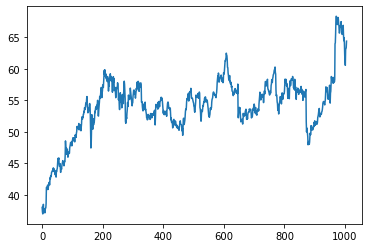

In [3]:
series = np.array(df[var])
plt.plot(series)
N = series.shape[0]

print("Série: ", var)
print("Tamanho da série: ", N)

Exemplos de Treinamento:  855
Exemplos de Teste:  150


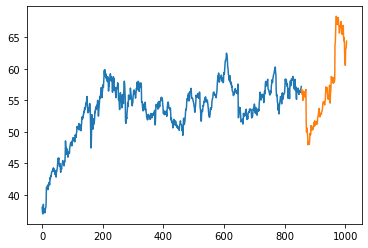

In [4]:
# calcula tamanhos dos dados de treinamento (n1) e teste (n2)
n1 = int(series.shape[0]*(porc_treinamento/100.0))
n2 = int(series.shape[0]*(1-(porc_treinamento/100.0)))

# divide dados de treinamento e teste
train, test = series[0:-n2], series[-n2:]

print("Exemplos de Treinamento: ", n1)
print("Exemplos de Teste: ", n2)
plt.plot(np.arange(0, n1+1), train)
plt.plot(np.arange(n1,n1+n2), test);

In [5]:
# modifica uma serie temporal tornando-a
# um problema de aprendizado supervisionado
def timeseries_to_supervised(series, look_back=1):
    x = series[:-look_back]
    y = np.array(series[look_back:], copy=True)
    return x,y

def normalize(train, test):
    d_max = np.max(train)
    d_min = np.min(train)
    return ((train - d_min) / (d_max-d_min)), ((test - d_min) / (d_max-d_min))

In [6]:
look_back = 1

n_train, n_test = normalize(train, test)

x_train, y_train = timeseries_to_supervised(n_train, look_back)
x_test, y_test = timeseries_to_supervised(n_test, look_back)

# formato deve ser [samples, time steps, features]
rnn_train = np.reshape(x_train, (x_train.shape[0], 1, 1))
rnn_test = np.reshape(x_test, (x_test.shape[0], 1, 1))

In [13]:
#REDE 1 - LTSM
modelLSTM = keras.models.Sequential()
modelLSTM.add(keras.layers.LSTM(16, return_sequences=True, activation='relu', input_shape=(1,1)))
modelLSTM.add(keras.layers.LSTM(8, activation='relu'))
modelLSTM.add(keras.layers.Dropout(0.2))
modelLSTM.add(keras.layers.Dense(1, activation='relu'))
modelLSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 16)             1152      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________


In [14]:
#REDE 2 - GRU
modelGRU = keras.models.Sequential()
modelGRU.add(keras.layers.GRU(16, return_sequences=True, activation='relu', input_shape=(1,1)))
modelGRU.add(keras.layers.GRU(8, activation='relu'))
modelGRU.add(keras.layers.Dropout(0.2))
modelGRU.add(keras.layers.Dense(1, activation='relu'))
modelGRU.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 16)             912       
_________________________________________________________________
gru_1 (GRU)                  (None, 8)                 624       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,545
Trainable params: 1,545
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Models é um dicionário com o primeiro elemento o conjunto de treino,
# o segundo o de teste e por último a rede em si.
# Perceba que a rede densa não usa o mesmo input que as RNNs.
models = {
    "LSTM": (rnn_train, rnn_test, modelLSTM),
    "GRU": (rnn_train, rnn_test, modelGRU),
}

batch_size = 1
epochs = 15
learning_rate = 0.001

models_mse = {}
preds = {}

for name, (train_model_data, test_model_data, model) in models.items():
    print(name)
    # seed(2)
    # set_seed(2)
    model.compile(loss='mse', 
                     optimizer=keras.optimizers.Adam(lr=learning_rate))
    hist = model.fit(train_model_data, y_train, epochs=epochs, 
                 batch_size=batch_size, 
                 verbose=1, shuffle=False)

    pred = model.predict(test_model_data).reshape(-1)
    mse = mean_squared_error(y_test, pred)
    print(f"MSE de {name}: {mse:.4}\n\n\n")
    models_mse[name] = mse
    preds[name] = pred

LSTM
Epoch 1/15
855/855 [==============================] - 4s 4ms/step - loss: 0.0208
Epoch 2/15
855/855 [==============================] - 4s 4ms/step - loss: 0.0159
Epoch 3/15
855/855 [==============================] - 4s 4ms/step - loss: 0.0129
Epoch 4/15
855/855 [==============================] - 4s 4ms/step - loss: 0.0111
Epoch 5/15
855/855 [==============================] - 4s 5ms/step - loss: 0.0105
Epoch 6/15
855/855 [==============================] - 4s 5ms/step - loss: 0.0107
Epoch 7/15
855/855 [==============================] - 4s 5ms/step - loss: 0.0102
Epoch 8/15
855/855 [==============================] - 4s 5ms/step - loss: 0.0106
Epoch 9/15
855/855 [==============================] - 4s 4ms/step - loss: 0.0105
Epoch 10/15
855/855 [==============================] - 4s 4ms/step - loss: 0.0099
Epoch 11/15
855/855 [==============================] - 4s 5ms/step - loss: 0.0101
Epoch 12/15
855/855 [==============================] - 4s 5ms/step - loss: 0.0099
Epoch 13/15
855/855 

In [17]:
models_mse

{'LSTM': 0.004802258932900959, 'GRU': 0.009990588609688301}

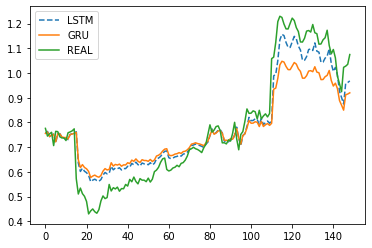

In [16]:
plt.plot(preds['LSTM'], '--',label='LSTM')
plt.plot(preds['GRU'], '-',label='GRU')
plt.plot(y_test,'-',label='REAL')
plt.legend();

---

### Questão 5)

Carregue o word embedding `glove_s50` em Português do NILC, conforme visto em aula, e obtenha os word embeddings das palavras: 'celular', 'triste', 'arte', 'livro', 'feliz', 'cansado', 'teclado', 'música', 'estudo', 'escritório'

Produza uma projeção em 2 dimensões utilizando o PCA com random_state=1 e visualize os embeddings das palavras em um scatterplot.

Compute as distâncias (Euclidiana) entre "celular", "triste", "arte" e as outras palavras descritas acima, considerando a projeção obtida. Quais palavras (excluindo elas mesmas) estão mais proximas?

(a) celular-estudo, triste-cansado, arte-música <br>
(b) celular-escritório, triste-cansado, arte-livro <br>
(c) celular-teclado, triste-feliz, arte-celular <br>
(d) celular-teclado, triste-feliz, arte-música <br>

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed

In [2]:
# descomente para baixar na primeira vez
# !wget http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s50.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# !mv download.php?file=embeddings%2Fglove%2Fglove_s50.zip glove_s50.zip
# !unzip -q glove_s50.zip

'mv' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
path_to_glove_file = "./glove_s50/glove_s50.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Encontrados %s word vectors." % len(embeddings_index))

Encontrados 929594 word vectors.


In [9]:
lista_palavras = {}
lista = ['celular', 'triste', 'arte', 'livro', 'feliz', 'cansado', 'teclado', 'música', 'estudo', 'escritório']
for word in lista:
    lista_palavras[word] = embeddings_index[word].values

celular
triste
arte
livro
feliz
cansado
teclado
música
estudo
escritório
